# 01 신경망의 개요

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/knou_deep_learning/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

코드 1-1 [1] 필요한 패키지 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

코드 1-1 [2] 데이터 준비 함수 정의하기

In [2]:
def prepare_data(target):
    iris = load_iris()          # iris data set 읽기
    X_tr = iris.data[:, 2:]     # 4개의 특징 중 꽃잎의 길이와 폭 선택
    labels = iris.target_names  # 'setosa', 'versicolor', 'vriginica'
    y = iris.target

    # 학습표본의 레이블 지정 - target에 지정된 레이블이면 1, 그 외는 0
    target_lable = np.where(labels == target)[0]
    y_tr = (y == target_lable).astype(int)
    return X_tr, y_tr, ['(1) '+target, '(0) the others']

코드 1-1 [3] 활성화 함수 - 단위 계단 함수

In [3]:
def step(x):
    return np.heaviside(x, 1)

코드 1-1 [4] 퍼셉트론 클래스 선언

In [4]:
class Perceptron:
    def __init__(self, dim, activation):
        rnd = np.random.default_rng()
        self.dim = dim
        self.activation = activation
        # 가중치(w)와 바이어스(b)를 He normal 방식으로 초기화
        self.w = rnd.normal(scale=np.sqrt(2.0 / dim), size=dim)
        self.b = rnd.normal(scale=np.sqrt(2.0 / dim))

    def print_w(self):
        for i in range(self.dim):
            print('  w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('  b = {:6.3f}'.format(self.b))

    def predict(self, x) : # numpy 배열 x에 저장된 표본의 출력 계산
        return self.activation(np.dot(x, self.w) + self.b)

    def fit(self, X, y, N, epochs, eta=0.01):
        # 학습표본의 인덱스를 무작위 순서로 섞음
        random_idx = np.random.permutation(N)
        X = X[random_idx]
        y = y[random_idx]
        print('w의 초깃값 ', end='')
        self.print_w()
        for j in range(epochs):
            for i in range(N):
                # x[1]에 대한 출력 오차 계산
                delta = self.predict(X[i]) - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            # 학습 과정 출력
            loss = self.predict(X) - y
            loss = (loss * loss).sum() / N
            print('에포크 = {:4d}    손실 = {:8.5f}'.format(j+1, loss), end='')
            self.print_w()
            if loss < 1e-5:
                break

코드 1-1 [5] 모델 시각화

In [5]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
              xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 일정 간격의 좌표값으로 나열
    x1_max = np.max(X[:, 0]) + 0.5
    x1_min = np.min(X[:, 0]) - 0.5
    x2_max = np.max(X[:, 1]) + 0.5
    x2_min = np.min(X[:, 1]) - 0.5
    x1_lin = np.linspace(x1_min, x1_max, 200)
    x2_lin = np.linspace(x2_min, x2_max, 200)

    # x1_lin과 x2_lin의 격자 좌표 값 구하기
    x1_mesh, x2_mesh = np.meshgrid(x1_lin, x2_lin)

    # (x1, x2) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = np.argmax(net.predict(X_test), axis=1)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)

    # 출력할 그래프의 수평/수직 범위 및 각 클래스에 대한 색상 및 범례 설정
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip (colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                    c=c, s=5, alpha=0.1, edgecolors='none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y==i, 0], X[y==i, 1],
                    c=c, s=20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()

코드 1-1 [6] 훈련 데이터 준비하기

In [6]:
samples = 60
dim = 2
target = 'setosa'
X_tr, y_tr, labels = prepare_data(target)

코드 1-1 [7] 페셉트론 객체 생성 및 학습

In [7]:
p = Perceptron(dim, activation=step)
p.fit(X_tr, y_tr, samples, epochs=100, eta=0.01)

w의 초깃값   w1 =  2.200  w2 = -0.261  b =  0.555
에포크 =    1    손실 =  0.16667  w1 =  1.763  w2 = -0.399  b =  0.455
에포크 =    2    손실 =  0.16667  w1 =  1.326  w2 = -0.537  b =  0.355
에포크 =    3    손실 =  0.16667  w1 =  0.889  w2 = -0.675  b =  0.255
에포크 =    4    손실 =  0.16667  w1 =  0.452  w2 = -0.813  b =  0.155
에포크 =    5    손실 =  0.01667  w1 =  0.203  w2 = -0.889  b =  0.105
에포크 =    6    손실 =  0.01667  w1 =  0.219  w2 = -0.883  b =  0.115
에포크 =    7    손실 =  0.08333  w1 =  0.235  w2 = -0.877  b =  0.125
에포크 =    8    손실 =  0.03333  w1 =  0.223  w2 = -0.879  b =  0.135
에포크 =    9    손실 =  0.01667  w1 =  0.193  w2 = -0.886  b =  0.135
에포크 =   10    손실 =  0.01667  w1 =  0.209  w2 = -0.880  b =  0.145
에포크 =   11    손실 =  0.06667  w1 =  0.225  w2 = -0.874  b =  0.155
에포크 =   12    손실 =  0.01667  w1 =  0.196  w2 = -0.881  b =  0.155
에포크 =   13    손실 =  0.03333  w1 =  0.212  w2 = -0.875  b =  0.165
에포크 =   14    손실 =  0.01667  w1 =  0.182  w2 = -0.882  b =  0.165
에포크 =   15    손실 =  0.01667  w

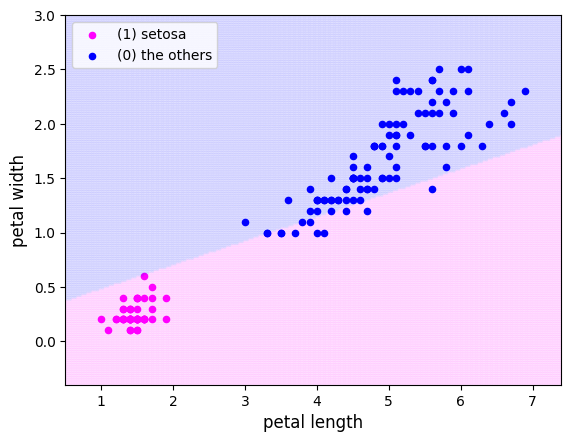

In [8]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='petal length',
          ylabel='petal width',
          legend_loc='upper left')

주관식 문제 1

In [9]:
def prepare_data(N):
    # N : 학습표본의 수
    # 클래스 0의 평균 좌표 : (1, 2)
    # 클래스 1의 평균 좌표 : (2, 1)
    C = np.array([[1, 2], [2, 1]])
    X = []
    y = []
    rnd = np.random.default_rng()
    # 각 클래스의 평균 좌표에 무작위 값을 더하여 학습표본 집합 생성
    for i in range(N):
        j = rnd.integers(0, 2)
        x = rnd.normal(loc=0.0, scale=0.2, size=2) + C[j]
        X.append(x)
        y.append(j)
    return np.array(X), np.array(y), ['0', '1']

In [10]:
X_tr, y_tr, labels = prepare_data(100)
p = Perceptron(dim, activation=step)
p.fit(X_tr, y_tr, samples, epochs=100, eta=0.01)

w의 초깃값   w1 = -0.370  w2 = -1.550  b =  0.663
에포크 =    1    손실 =  0.16667  w1 =  0.195  w2 = -1.259  b =  0.943
에포크 =    2    손실 =  0.06667  w1 =  0.277  w2 = -1.203  b =  0.983
에포크 =    3    손실 =  0.00000  w1 =  0.337  w2 = -1.160  b =  1.013


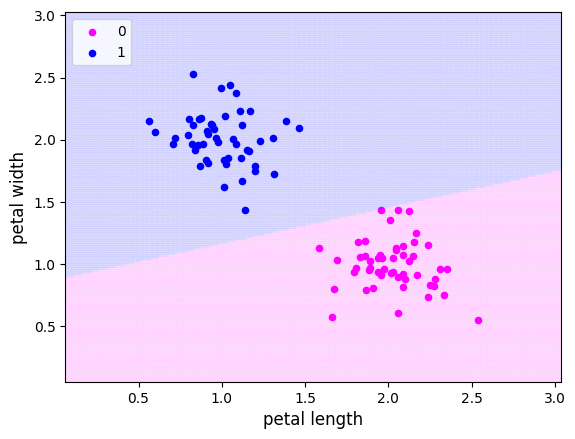

In [11]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='petal length',
          ylabel='petal width',
          legend_loc='upper left')

주관식 문제 2

In [12]:
def prepare_data(N) :
    # N : 학습표본의 수
    # 클래스 0의 평균 좌표 : (1, 2), (2, 1)
    # 클래스 1의 평균 좌표 : (1, 1), (2, 2)
    C = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
    X = []
    y = []
    rnd = np.random.default_rng()
    # 각 클래스의 평균 좌표에 무작위 값을 더하여 학습표본 집합 생성
    for i in range (N):
        j = rnd.integers(0, 4)
        x = np.array(rnd.normal(loc=0.0, scale=0.2, size=2)) + C[j]
        X.append(x)
        y.append(j // 2)
    return np.array(X), np.array(y), ['0', '1']

In [13]:
X_tr, y_tr, labels = prepare_data(100)
p = Perceptron(dim, activation=step)
p.fit(X_tr, y_tr, samples, epochs=100, eta=0.01)

w의 초깃값   w1 =  0.673  w2 = -0.578  b =  0.601
에포크 =    1    손실 =  0.21667  w1 =  0.501  w2 = -0.691  b =  0.501
에포크 =    2    손실 =  0.30000  w1 =  0.433  w2 = -0.656  b =  0.471
에포크 =    3    손실 =  0.30000  w1 =  0.386  w2 = -0.599  b =  0.451
에포크 =    4    손실 =  0.30000  w1 =  0.339  w2 = -0.543  b =  0.431
에포크 =    5    손실 =  0.28333  w1 =  0.292  w2 = -0.486  b =  0.411
에포크 =    6    손실 =  0.28333  w1 =  0.245  w2 = -0.430  b =  0.391
에포크 =    7    손실 =  0.28333  w1 =  0.198  w2 = -0.373  b =  0.371
에포크 =    8    손실 =  0.23333  w1 =  0.164  w2 = -0.318  b =  0.351
에포크 =    9    손실 =  0.20000  w1 =  0.129  w2 = -0.263  b =  0.331
에포크 =   10    손실 =  0.33333  w1 =  0.082  w2 = -0.231  b =  0.301
에포크 =   11    손실 =  0.41667  w1 =  0.043  w2 = -0.199  b =  0.271
에포크 =   12    손실 =  0.36667  w1 =  0.019  w2 = -0.149  b =  0.251
에포크 =   13    손실 =  0.43333  w1 = -0.015  w2 = -0.119  b =  0.221
에포크 =   14    손실 =  0.41667  w1 = -0.037  w2 = -0.101  b =  0.191
에포크 =   15    손실 =  0.38333  w

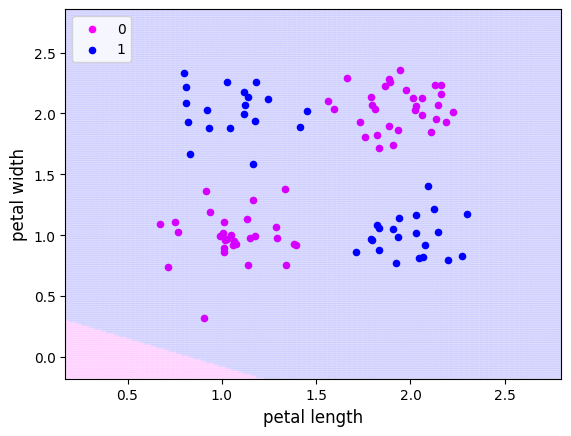

In [14]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='petal length',
          ylabel='petal width',
          legend_loc='upper left')